In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Euler

Text(0,0.5,'tropas')

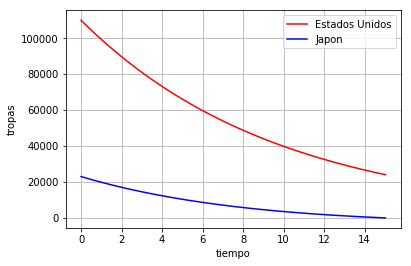

In [59]:
to=0
tf=20
n=10000
t=to
h=(tf-to)/n

y[0]=110000 #EE.UU
y[1]=23000 #Japon
b=0.02
a=0.05

y_u=array([y[0]])
y_j=array([y[1]])
t_=array([t])

while (t<tf) and (y[1]>=0):
    y[0]=y[0]+h*(-(0.5*b*y[1])-(2*a*y[0]))
    y[1]=y[1]+h*(-b*y[0]-a*y[1])
    t+=h
    y_u = np.append(y_u,y[0])
    y_j = np.append(y_j,y[1])
    t_ = np.append(t_,t)
    
plot(t_,y_u,color="red", label="Estados Unidos")
plot(t_,y_j,color="blue", label="Japon")
plt.grid()
plt.legend()
plt.xlabel("tiempo")
plt.ylabel("tropas")

# RK4

In [37]:
#Metodo de RK4
def RK4(f,y,t,b,n):
#generando los tamaños
    d  = len(y)      
    k1 = np.zeros(d)
    k2 = np.zeros(d)
    k3 = np.zeros(d)
    k4 = np.zeros(d)
    
    tt = np.zeros(n)    
    Y  = np.zeros((d,n))      
    h = (b - t)/n
    ti = 0
    while ti<n:
#Almacenando los espcacios
        Y[:, ti] = y
        tt[ti] = t
#Ecuacion del metodo
        k1 = h*f(t, y)
        k2 = h*f(t + h/2, y + k1/2)
        k3 = h*f(t + h/2, y + k2/2)
        k4 = h*f(t + h, y + k3)
#Ultima parte del RK4
        y = y + (k1 + 2*(k2 + k3) + k4)/6
    
        t += h   
        ti += 1  
        
    return Y,tt 

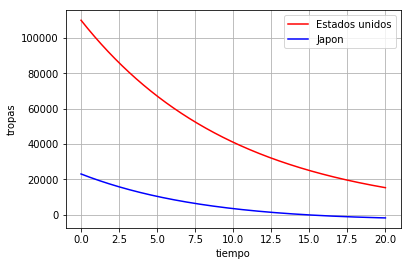

In [58]:
y0 = np.array([110000, 23000])
to = 0
tf = 20
a = 0.05
c = 0.02
n = 10000

def f(t,y0):
    f1 = -(0.5*c*y0[0]*y[1])-(2*a*y0[0])
    f2 = -c*y0[0]-a*y0[1]
    return np.array([f1,f2])

Y, tiempo = RK4(f,y0,to,tf,n)

plt.plot(tiempo, Y[0], color="red",label="Estados unidos")
plt.plot(tiempo, Y[1], color="blue", label="Japon")
plt.legend()
plt.xlabel('tiempo')
plt.ylabel('tropas')
plt.grid()

# Odeint

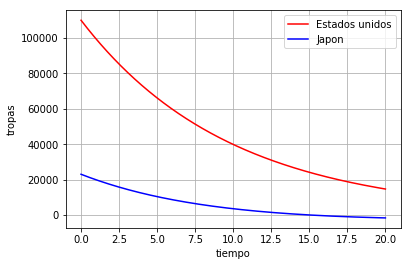

In [48]:
to = 0
tf = 20
n = 10000

t_ = linspace(to,tf,n)

y0 = np.array([110000, 23000])

b=0.02
a=0.05

def pend(y,t,b,a):
    theta, omega = y
    dydt = [-(0.5*b*y[1])-(2*a*y[0]),-b*y[0]-a*y[1]]
    return dydt

sol = odeint(pend, y0, t_, args=(b, a))
y_u = sol[:, 0]
y_j = sol[:, 1]

plot(t_,y_u, color="red", label="Estados unidos")
plot(t_,y_j, color="blue", label="Japon")
plt.legend()
plt.xlabel('tiempo')
plt.ylabel('tropas')
plt.grid()

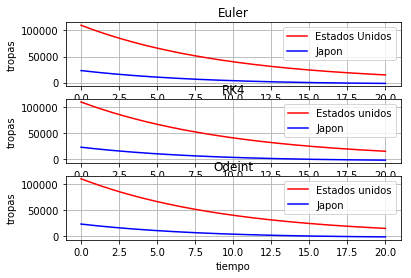

In [53]:
plt.subplot(3,1,1)
plot(t_,y_u,color="red", label="Estados Unidos")
plot(t_,y_j,color="blue", label="Japon")
plt.title("Euler")
plt.grid()
plt.legend()
plt.xlabel("tiempo")
plt.ylabel("tropas")
plt.subplot(3,1,2)
plt.plot(tiempo, Y[0], color="red",label="Estados unidos")
plt.plot(tiempo, Y[1], color="blue", label="Japon")
plt.title("RK4")
plt.legend()
plt.xlabel('tiempo')
plt.ylabel('tropas')
plt.grid()
plt.subplot(3,1,3)
plot(t_,y_u, color="red", label="Estados unidos")
plot(t_,y_j, color="blue", label="Japon")
plt.title("Odeint")
plt.legend()
plt.xlabel('tiempo')
plt.ylabel('tropas')
plt.grid()

# Modelo de guerrilla (ecuacion 2) con RK4

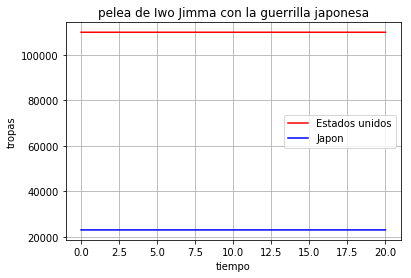

In [56]:
y0 = np.array([110000, 23000])
to = 0
tf = 20
a = 0.05
c = 0.02
n = 10000

def f(t,y0):
    f1 = -(0.5*c*y[1])-(2*a*y[0])
    f2 = -(0.5*c*y[1]*y[0])-(a*y[1])
    return np.array([f1,f2])

Y, tiempo = RK4(f,y0,to,tf,n)

plt.plot(tiempo, Y[0], color="red",label="Estados unidos")
plt.plot(tiempo, Y[1], color="blue", label="Japon")
plt.title("pelea de Iwo Jimma con la guerrilla japonesa")
plt.legend()
plt.xlabel('tiempo')
plt.ylabel('tropas')
plt.grid()